## a.Load the titanic dataset into a pandas DataFrame

In [242]:
import pandas as pd

In [243]:
titanic_df = pd.read_csv(r"P:\data\titanic.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [244]:
titanic_df = titanic_df.drop(['PassengerId','Name'],axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
titanic_df['Age'].isnull().sum()

177

In [246]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [247]:
titanic_df['Age'].median()

28.0

## b.Handling missing values for the "Age" column

In [248]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Age'].isnull().sum() 

0

* We filled the null values with the median of the Age column

In [249]:
from sklearn.preprocessing import OneHotEncoder

In [250]:
onehot = OneHotEncoder()
sex_array = onehot.fit_transform(titanic_df[['Sex']]).toarray()

In [251]:
sex_array

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [252]:
sex_df = pd.DataFrame(data=sex_array,columns=onehot.get_feature_names_out(['Sex']))
sex_df.head()

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


## c.Convert the sex column into numerical format using one-hot encoding

In [253]:
titanic_df = pd.concat([titanic_df,sex_df],axis=1)
titanic_df = titanic_df.drop('Sex',axis=1)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0
3,1,1,35.0,1,0,113803,53.1000,C123,S,1.0,0.0
4,0,3,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0


In [254]:
titanic_df['Fare'].mean()

32.204207968574636

## d.Normalize the "fare" column

In [255]:
from sklearn.preprocessing import StandardScaler

In [256]:
normalize = StandardScaler()
titanic_df['Fare'] = normalize.fit_transform(titanic_df[['Fare']])

In [257]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,A/5 21171,-0.502445,NaN,S,0.0,1.0
1,1,1,38.0,1,0,PC 17599,0.786845,C85,C,1.0,0.0
2,1,3,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S,1.0,0.0
3,1,1,35.0,1,0,113803,0.420730,C123,S,1.0,0.0
4,0,3,35.0,0,0,373450,-0.486337,NaN,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,211536,-0.386671,NaN,S,0.0,1.0
887,1,1,19.0,0,0,112053,-0.044381,B42,S,1.0,0.0
888,0,3,28.0,1,2,W./C. 6607,-0.176263,NaN,S,1.0,0.0
889,1,1,26.0,0,0,111369,-0.044381,C148,C,0.0,1.0


In [258]:
titanic_df['Fare'].mean()

3.987332972840069e-18

## d.Spliting the data into training(80%) and testing(20%)

In [259]:
X = titanic_df.drop('Survived',axis=1)
Y = titanic_df['Survived']

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(712, 10) (712,) (179, 10) (179,)


In [262]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Ticket      891 non-null    object 
 6   Fare        891 non-null    float64
 7   Cabin       204 non-null    object 
 8   Embarked    889 non-null    object 
 9   Sex_female  891 non-null    float64
 10  Sex_male    891 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 76.7+ KB


## cabin column has high missing values, bettter to drop the column

In [263]:
titanic_df = titanic_df.drop('Cabin',axis=1)
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,A/5 21171,-0.502445,S,0.0,1.0
1,1,1,38.0,1,0,PC 17599,0.786845,C,1.0,0.0
2,1,3,26.0,0,0,STON/O2. 3101282,-0.488854,S,1.0,0.0
3,1,1,35.0,1,0,113803,0.420730,S,1.0,0.0
4,0,3,35.0,0,0,373450,-0.486337,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,211536,-0.386671,S,0.0,1.0
887,1,1,19.0,0,0,112053,-0.044381,S,1.0,0.0
888,0,3,28.0,1,2,W./C. 6607,-0.176263,S,1.0,0.0
889,1,1,26.0,0,0,111369,-0.044381,C,0.0,1.0


# Question - 2

In [264]:
onehot1 = OneHotEncoder()
emb_array = onehot1.fit_transform(titanic_df[['Embarked']]).toarray()
emb_df = pd.DataFrame(data=emb_array,columns=onehot1.get_feature_names_out(['Embarked']))
titanic_df = pd.concat([titanic_df,emb_df],axis=1)
titanic_df = titanic_df.drop('Embarked',axis=1)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,22.0,1,0,A/5 21171,-0.502445,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,38.0,1,0,PC 17599,0.786845,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.0,0,0,STON/O2. 3101282,-0.488854,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,35.0,1,0,113803,0.420730,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,35.0,0,0,373450,-0.486337,0.0,1.0,0.0,0.0,1.0,0.0


In [265]:
titanic_df = titanic_df.drop(['Sex_male','Ticket','Embarked_nan'],axis=1)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,-0.502445,0.0,0.0,0.0,1.0
1,1,1,38.0,1,0,0.786845,1.0,1.0,0.0,0.0
2,1,3,26.0,0,0,-0.488854,1.0,0.0,0.0,1.0
3,1,1,35.0,1,0,0.420730,1.0,0.0,0.0,1.0
4,0,3,35.0,0,0,-0.486337,0.0,0.0,0.0,1.0


In [266]:
X = titanic_df.drop('Survived',axis=1)
Y = titanic_df['Survived']

In [267]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(712, 9) (712,) (179, 9) (179,)


In [268]:
scaler1 = StandardScaler()
x_train_scaled = scaler1.fit_transform(x_train)
x_train_scaled

array([[-1.61413602,  1.25364106, -0.47072241, ..., -0.46146201,
        -0.30335547,  0.59681695],
       [-0.40055118, -0.47728355, -0.47072241, ..., -0.46146201,
        -0.30335547,  0.59681695],
       [ 0.81303367,  0.21508629, -0.47072241, ..., -0.46146201,
        -0.30335547,  0.59681695],
       ...,
       [ 0.81303367,  0.90745614,  1.23056874, ..., -0.46146201,
        -0.30335547,  0.59681695],
       [-1.61413602, -1.1696534 ,  0.37992316, ..., -0.46146201,
        -0.30335547,  0.59681695],
       [-1.61413602, -0.63114352, -0.47072241, ..., -0.46146201,
        -0.30335547,  0.59681695]])

In [269]:
scaler2 = StandardScaler()
x_test_scaled = scaler1.fit_transform(x_test)
x_test_scaled

array([[ 0.88742288, -0.15235845,  0.82036305, ...,  1.77842366,
        -0.32394177, -1.40830868],
       [-0.25537349,  0.07757294, -0.55202   , ..., -0.56229571,
        -0.32394177,  0.7100716 ],
       [ 0.88742288, -0.76550883, -0.55202   , ..., -0.56229571,
        -0.32394177,  0.7100716 ],
       ...,
       [ 0.88742288,  0.61407953,  0.82036305, ..., -0.56229571,
        -0.32394177,  0.7100716 ],
       [-0.25537349, -0.99544022, -0.55202   , ..., -0.56229571,
        -0.32394177,  0.7100716 ],
       [ 0.88742288, -1.99180959,  0.82036305, ..., -0.56229571,
        -0.32394177,  0.7100716 ]])

In [270]:
titanic_df.shape #(891, 10)

(891, 10)

# 2.Question
## Build a Sequential neural network using TensorFlow/Keras for binary classification with the following structure:

In [271]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,layers
from tensorflow.keras.layers import Dense

* Input layer with the appropriate number of features.
* One hidden layer with 16 neurons and ReLU activation.
* Another hidden layer with 8 neurons and ReLU activation.
* Output layer with 1 neuron and sigmoid activation.

In [282]:
model = Sequential()
#Input layer with the appropriate number of features
model.add(Dense(16,activation='relu',input_dim=9))

#One hidden layer with 16 neurons and ReLU activation
model.add(Dense(8,activation='relu'))

#Output layer with 1 neuron and sigmoid activation
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

## b. Compile the model usingappropriate loss function and optimizer.

In [283]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [287]:
model.fit(x_train_scaled,y_train,epochs=50,batch_size=15,verbose=2)

Epoch 1/50
48/48 - 0s - 2ms/step - accuracy: 0.8469 - loss: 0.3588
Epoch 2/50
48/48 - 0s - 2ms/step - accuracy: 0.8469 - loss: 0.3590
Epoch 3/50
48/48 - 0s - 2ms/step - accuracy: 0.8469 - loss: 0.3595
Epoch 4/50
48/48 - 0s - 2ms/step - accuracy: 0.8469 - loss: 0.3582
Epoch 5/50
48/48 - 0s - 2ms/step - accuracy: 0.8399 - loss: 0.3592
Epoch 6/50
48/48 - 0s - 2ms/step - accuracy: 0.8469 - loss: 0.3582
Epoch 7/50
48/48 - 0s - 2ms/step - accuracy: 0.8483 - loss: 0.3579
Epoch 8/50
48/48 - 0s - 2ms/step - accuracy: 0.8469 - loss: 0.3582
Epoch 9/50
48/48 - 0s - 2ms/step - accuracy: 0.8511 - loss: 0.3573
Epoch 10/50
48/48 - 0s - 2ms/step - accuracy: 0.8469 - loss: 0.3569
Epoch 11/50
48/48 - 0s - 2ms/step - accuracy: 0.8469 - loss: 0.3569
Epoch 12/50
48/48 - 0s - 2ms/step - accuracy: 0.8483 - loss: 0.3560
Epoch 13/50
48/48 - 0s - 2ms/step - accuracy: 0.8483 - loss: 0.3567
Epoch 14/50
48/48 - 0s - 2ms/step - accuracy: 0.8497 - loss: 0.3565
Epoch 15/50
48/48 - 0s - 2ms/step - accuracy: 0.8427 - lo

## c. Train the model for different epochs and report the accuracy on the test set. (mention the epoch on which you have accuracy greater that 85%)

*  Epoch 31/50
*  48/48 - 0s - 2ms/step - accuracy: 0.8511 - loss: 0.3515

* 85% on 31st epoch

# 3 - Question
## a. Evaluate the model on the test data and report the test accuracy

In [290]:


test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.4534 
Test Accuracy: 79.89%


In [291]:
history = model.fit(x_train_scaled,y_train,epochs=50,batch_size=15,validation_data=(x_test_scaled, y_test))

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8294 - loss: 0.3527 - val_accuracy: 0.7989 - val_loss: 0.4661
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8561 - loss: 0.3438 - val_accuracy: 0.8045 - val_loss: 0.4661
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3350 - val_accuracy: 0.8045 - val_loss: 0.4653
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8416 - loss: 0.3498 - val_accuracy: 0.7989 - val_loss: 0.4630
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8593 - loss: 0.3344 - val_accuracy: 0.8045 - val_loss: 0.4699
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8403 - loss: 0.3590 - val_accuracy: 0.7989 - val_loss: 0.4736
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8250 - loss: 0.3785 - val_accuracy: 0.7933 - val_loss: 0.4740
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8311 - loss: 0.3688 - val_accuracy: 0.7989 - val_loss:

##  b. Plot the training and validation accuracy curves over the epochs

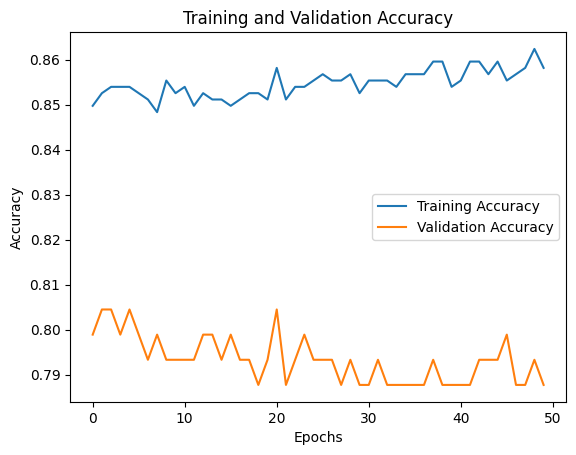

In [292]:

import matplotlib.pyplot as plt

# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## c. Plot the training and validation loss curves over the epochs

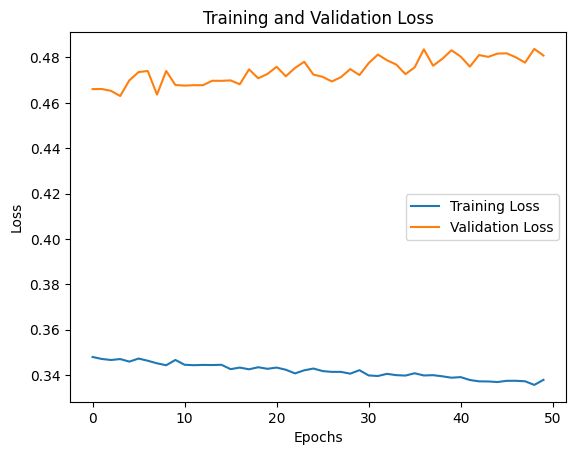

In [293]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## d. Confusion matrix and explanation (optional)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


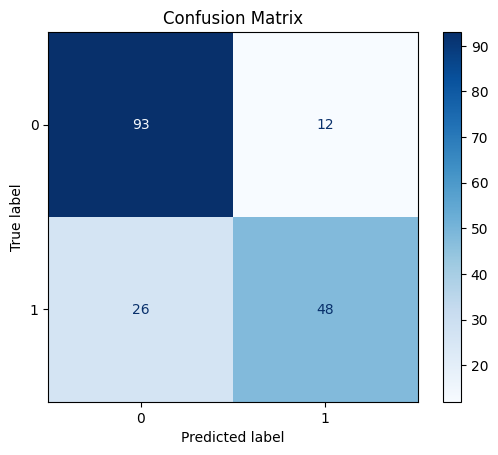

In [296]:


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions (rounded for binary classification)
y_pred = model.predict(x_test_scaled)
y_pred_rounded = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rounded)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
